The purpose of this notebook is to investigate the effects of whitening on various
image data sets. So far, these data sets include the following:
* Google SVHN
* STL-10
* CIFAR-10

In [1]:
require "os"
require "lfs"
require "hdf5"
require "mattorch"

require "math"
require "image"

if lfs.currentdir() == "/home/aditya/projects/image_pp_tests/notebooks" then
    lfs.chdir("/home/aditya/projects/image_pp_tests")
end

print("Working directory: " .. lfs.currentdir())

Working directory: /home/aditya/projects/image_pp_tests	


In [7]:
file = hdf5.open("data/cifar_10/normalized/data_batch_1.hdf5")
raw_inputs = file:read("inputs"):all()

Top 54 images:	


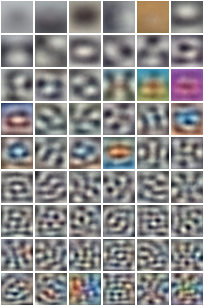

Bottom 54 images:	


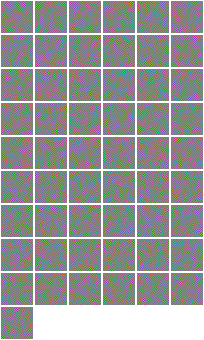

Around 178:	


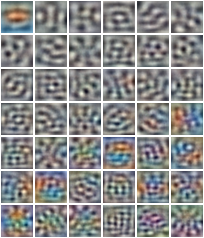

In [24]:
file = hdf5.open("data/svd_results/cifar_10.hdf5")
s = file:read("singular values"):all()
v = file:read("eigenvectors"):all()

top_images = {}
for i = 1, 54 do
    top_images[#top_images + 1] = v[i]:reshape(3, 32, 32)
end

bottom_images = {}
for i = 0, 54 do
    bottom_images[#bottom_images + 1] = v[v:size(1) - i]:reshape(3, 32, 32)
end

middle_images = {}
for i = -20, 21 do
    middle_images[#middle_images + 1] = v[48 + i]:reshape(3, 32, 32)
end

print("Top 54 images:")
itorch.image(top_images)

print("Bottom 54 images:")
itorch.image(bottom_images)

print("Around 178:")
itorch.image(middle_images)

In [3]:
Plot = require 'itorch.Plot'

plot = Plot():histogram(s):draw()

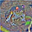

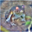

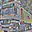

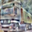

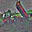

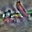

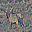

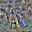

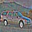

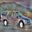

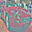

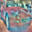

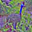

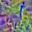

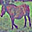

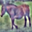

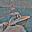

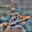

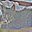

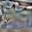

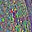

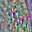

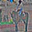

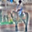

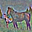

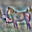

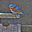

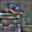

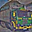

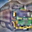

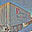

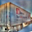

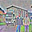

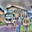

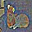

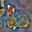

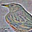

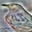

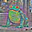

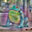

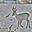

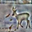

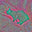

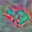

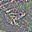

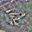

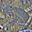

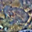

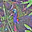

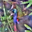

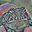

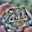

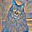

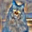

epsilon = 100	


In [34]:
eps = {100}--, 50, 25, 10, 1, 1e-1, 1e-3, 1e-5, 1e-7}

-- Note: clamping doesn't work well, because even the "noisy" eigenvectors are used
-- to represent information that is "missed" by the more important ones. If we scale
-- along the important eigenvectors but not along the unimportant ones, then artifacts
-- will show up because there is nothing in the image to compensate for the error in
-- reconstruction made by the more important eigenvectors.

for _, e in pairs(eps) do
    images = {}
    scale = torch.diag(torch.pow(s, 2):div(3999):add(0.1):pow(-0.5))
    idx = torch.lt(s, 115.53380123614232)
    s_2 = s:clone()
    s_2[idx] = 1
    scale_2 = torch.diag(torch.pow(s_2, -1))
    --s_copy = s:clone()
    --s_copy[torch.le(s_copy, 180)] = 1
    --scale = torch.diag(torch.pow(s_copy, -1))
    w_zca = v:t() * scale * v
    w_zca_2 = v:t() * scale_2 * v

    for i = 1, 27 do
        --images[#images + 1] = raw_inputs[i]
        img = raw_inputs[i]:reshape(1, 3 * 32 * 32)
        img_mod = img * w_zca
        img_mod_2 = img * w_zca_2
        itorch.image(img_mod:reshape(3, 32, 32))
        itorch.image(img_mod_2:reshape(3, 32, 32))
        --images[#images + 1] = img_mod
    end
    
    print("epsilon = " .. e)
    --itorch.image(images)
end

In [36]:
file = hdf5.open("data/svhn/image_std/train_small_nrgb.hdf5")
raw_inputs = file:read("inputs"):all()

Top 54 images:	


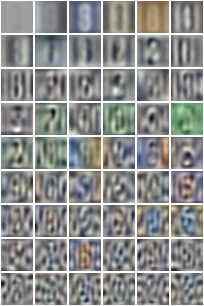

Bottom 54 images:	


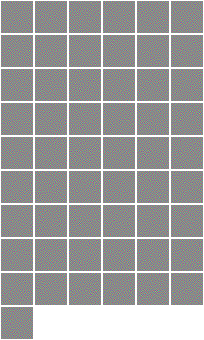

Around 178:	


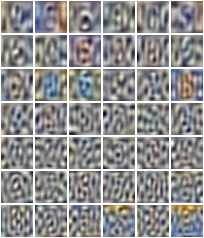

In [37]:
file = hdf5.open("data/svd_results/svhn.hdf5")
s = file:read("singular values"):all()
v = file:read("eigenvectors"):all()

top_images = {}
for i = 1, 54 do
    top_images[#top_images + 1] = v[i]:reshape(3, 32, 32)
end

bottom_images = {}
for i = 0, 54 do
    bottom_images[#bottom_images + 1] = v[v:size(1) - i]:reshape(3, 32, 32)
end

middle_images = {}
for i = -20, 21 do
    middle_images[#middle_images + 1] = v[48 + i]:reshape(3, 32, 32)
end

print("Top 54 images:")
itorch.image(top_images)

print("Bottom 54 images:")
itorch.image(bottom_images)

print("Around 178:")
itorch.image(middle_images)

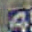

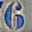

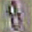

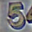

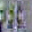

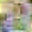

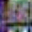

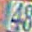

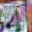

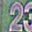

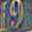

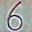

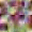

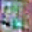

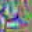

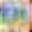

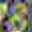

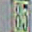

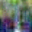

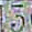

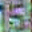

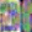

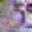

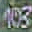

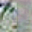

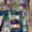

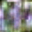

epsilon = 100	


In [59]:
eps = {100}--, 50, 25, 10, 1, 1e-1, 1e-3, 1e-5, 1e-7}

-- Note: clamping doesn't work well, because even the "noisy" eigenvectors are used
-- to represent information that is "missed" by the more important ones. If we scale
-- along the important eigenvectors but not along the unimportant ones, then artifacts
-- will show up because there is nothing in the image to compensate for the error in
-- reconstruction made by the more important eigenvectors.

for _, e in pairs(eps) do
    images = {}
    scale = torch.diag(torch.pow(s, 2):div(3999):add(1):pow(-0.5))
    --idx = torch.lt(s, 115.53380123614232)
    --s_2 = s:clone()
    --s_2[idx] = 1
    --scale_2 = torch.diag(torch.pow(s_2, -1))
    --s_copy = s:clone()
    --s_copy[torch.le(s_copy, 180)] = 1
    --scale = torch.diag(torch.pow(s_copy, -1))
    w_zca = v:t() * scale * v
    --w_zca_2 = v:t() * scale_2 * v

    for i = 1, 27 do
        --images[#images + 1] = raw_inputs[i]
        img = raw_inputs[i]:reshape(1, 3 * 32 * 32)
        img_mod = img * w_zca
        --img_mod_2 = img * w_zca_2
        itorch.image(img_mod:reshape(3, 32, 32))
        --itorch.image(img_mod_2:reshape(3, 32, 32))
        --images[#images + 1] = img_mod
    end
    
    print("epsilon = " .. e)
    --itorch.image(images)
end